# Проект: Исследование стартапов

- Автор: Лаптева Диана
- Дата: 20.12.2024

## Введение

### Цель проекта

<font color='#777778'> Определить тенденции развивающихся и перспективных стартапов. </font>

### Задачи проекта 

<font color='#777778'>    
    
- Обработка и предобработка данных 
    
- Проанализировать данные о сотрудниках стартапов и их образовании
    
- Выявить причины возникновения покупок с низкой стоимостью

- Определение стоимость в зависимости от категории стартапов и количества раундов финансирования перед его покупкой
    
- Выявление перспективных развитий</font>

### Описание данных

<font color='#777778'>

В проекте будут использованны данные датасета `acquisition.csv` со следующим описанием:
    
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.
    
    
Также будет использован датасет `company_and_rounds.csv` с описанием:
    
- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.
- `milestones` — вехи финансирования.
    
В том числе будем использовать датасет `fund.csv`, содержащий сведения о:
    
- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория области деятельности компании.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.
    
Датасет `investment.csv` с информацией о раундах инвестирования:
    
- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — индентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.
    
Датасет `education.csv`с описанием:

- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.
    
Датасет `people` с информацией:
    
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.
- `graduated_at` — дата получения образования.
    
Датасет `degrees` с описанием:

- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

### Содержимое проекта

<font color='#777778'>

1. [Загрузка и знакомство с данными.](#1-bullet)
2. [Предобработка данных, предворительное исследование.](#2-bullet)
3. [Исследовательский анализ данных.](#3-bullet)
4. [Итоговый вывод и рекомендации](#4-bullet)
</font>

---

<a class="anchor" id="1-bullet"></a>
## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

* Загрузите все данные по проекту.

* Проверьте названия столбцов и есть ли в датасетах полные дубликаты строк.

* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

Импотируем все необходимые библиотеки. Будем использовать `pandas`.

In [902]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [903]:
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

Выведем основную информацию о данных с помощью метода `info()` и первые строки датасетов, используя `head()`.

In [904]:
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [905]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [906]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [907]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [908]:
company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [909]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [910]:
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [911]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [912]:
fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [913]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [914]:
investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [915]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [916]:
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [917]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Приведем названия всех столбцов к единому стилю.

In [918]:
def clean_column_names(df):
    df.columns = df.columns.str.lower().str.strip().str.replace(r'\s+', '_', regex=True)
    return df

datasets = {
    'acquisition': acquisition,
    'company_and_rounds': company_and_rounds,
    'degrees': degrees,
    'education': education,
    'fund': fund,
    'investment': investment,
    'people': people,
}

for name, df in datasets.items():
    datasets[name] = clean_column_names(df)

Выведем всю необходимою информацию о датасетах для дальнейшей обработки данных.

In [919]:
# Проверим на наличие полных дубликатов

duplicates = {name: df.duplicated().sum() for name, df in datasets.items()}

# Выводем информации о пропусках, дубликатах и типах данных
info_dict = {}
for name, df in datasets.items():
    info_dict[name] = {
        'shape': df.shape, # размер датафрейма
        'missing_values': df.isnull().sum() / len(df) * 100, # процент пропущенных значений
        'duplicates': duplicates[name], # полные дубликаты
        'dtypes': df.dtypes, # типы
    }
    
for name, info in info_dict.items():
    print(f"\n=== Dataset: {name} ===")
    print(f"Shape: {info['shape']}")
    print(f"Duplicates: {info['duplicates']}")
    print("Missing values (%):")
    print(info['missing_values'])
    print("Data types:")
    print(info['dtypes'])


=== Dataset: acquisition ===
Shape: (9407, 6)
Duplicates: 0
Missing values (%):
id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64
Data types:
id                       int64
acquiring_company_id     int64
acquired_company_id      int64
term_code               object
price_amount             int64
acquired_at             object
dtype: object

=== Dataset: company_and_rounds ===
Shape: (217774, 22)
Duplicates: 0
Missing values (%):
company_id              0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
m

**Вывод**

На данном этапе название всех столбцов во всех датасетах были приведены к единому стилю.

Полных дубликатов не обнаружено.

Пропуски отсутствуют только в датасете `investment`. В остальных датасетах процент пропусков достаточно высокий.

Некоторые столбцы, содержащие даты (`founded_at`, `closed_at`, `graduated_at`, `acquired_at`), имеют тип `object` и требуют преобразования в тип `datetime`.

### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

Изменим тип данных в столбцах, которые хранят данные с датой и временем

In [920]:
# Преобразование столбцов с датами
date_columns = {
    'acquisition': ['acquired_at'],
    'company_and_rounds': ['founded_at', 'closed_at', 'funded_at'],
    'education': ['graduated_at'],
    'fund': ['founded_at'],
}

for dataset_name, columns in date_columns.items():
    for column in columns:
        datasets[dataset_name][column] = pd.to_datetime(datasets[dataset_name][column], errors='coerce')

**Вывод**

Датасет `investment`не содержит пропусков, в `people` их минимальное количество.

В датасете `company_and_rounds` есть серьёзные пропуски в критически важных столбцах (`founded_at`, `closed_at`). Это сильно ослажняет дальнейшую работу.

В дальнейшем нам следует сконцентрироваться на датасетах с минимальными пропусками (`acquisition`, `degrees`, `education`, `investment`). А также удалить или заполнить пропуски в ключевых столбцах (`category_code`, `founded_at`, `graduated_at` и т. д.)

**Вывод**

Даты преобразованы в корректный формат.

Датасеты имеют большое количество пропусков. Требуется предобработка дыннх для устранения дубликатов и нормализации значений. Однако данных достаточно для выполнения задач заказчика. 

<a class="anchor" id="2-bullet"></a>
## Шаг 2. Предобработка данных, предварительное исследование

### 2.1. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [921]:
# Выделим уникальные значения network_username в каждом датасете
fund_usernames = set(datasets['fund']['network_username'].dropna())
company_usernames = set(datasets['company_and_rounds']['network_username'].dropna())
people_usernames = set(datasets['people']['network_username'].dropna())

# Найдём пересечения
common_fc = fund_usernames & company_usernames
common_fp = fund_usernames & people_usernames
common_cp = company_usernames & people_usernames
common_three = fund_usernames & company_usernames & people_usernames

print(f"Общее количество уникальных значений в fund: {len(fund_usernames)}")
print(f"Общее количество уникальных значений в company_and_rounds: {len(company_usernames)}")
print(f"Общее количество уникальных значений в people: {len(people_usernames)}")

print(f"Количество общих значений (fund и company_and_rounds): {len(common_fc)}")
print(f"Количество общих значений (fund и people): {len(common_fp)}")
print(f"Количество общих значений (company_and_rounds и people): {len(common_cp)}")
print(f"Количество общих значений (все три таблицы): {len(common_three)}")

print(f"Доля общих значений (fund и company_and_rounds): {len(common_fc) / len(company_usernames) * 100:.2f}%")
print(f"Доля общих значений (fund и people): {len(common_fp) / len(people_usernames) * 100:.2f}%")
print(f"Доля общих значений (company_and_rounds и people): {len(common_cp) / len(people_usernames) * 100:.2f}%")
print(f"Доля общих значений (все три таблицы): {len(common_three) / len(people_usernames) * 100:.2f}%")

Общее количество уникальных значений в fund: 2098
Общее количество уникальных значений в company_and_rounds: 79571
Общее количество уникальных значений в people: 38421
Количество общих значений (fund и company_and_rounds): 70
Количество общих значений (fund и people): 79
Количество общих значений (company_and_rounds и people): 2199
Количество общих значений (все три таблицы): 7
Доля общих значений (fund и company_and_rounds): 0.09%
Доля общих значений (fund и people): 0.21%
Доля общих значений (company_and_rounds и people): 5.72%
Доля общих значений (все три таблицы): 0.02%


**Вывод**

Доля общих значений невероятно низкая, с чего можно сделать вывод, что данные не связаны напрямую и объединение через этот столбец может нести ошибки.


### 2.2. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

Выведем первые 5 строк датасета `company_and_rounds`

In [922]:
company_and_rounds.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


Как мы видим, таблица содержит два одинаковых столбца `company_id`, разберемся с этим:

In [923]:
company_and_rounds_filtered = company_and_rounds.loc[:, ~company_and_rounds.columns.duplicated()]

company_and_rounds_filtered

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_total,milestones,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,39750000.0,5.0,888.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,39750000.0,5.0,889.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,39750000.0,5.0,2312.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,0.0,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,0.0,4.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,56454.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,56542.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,56543.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,56928.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


Посмотрим названия всех столбцов

In [924]:
company_and_rounds_filtered.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'funded_at', 'funding_round_type', 'raised_amount',
       'pre_money_valuation', 'participants', 'is_first_round',
       'is_last_round'],
      dtype='object')

Получившиеся таблица объединяет две разные информации: данные о компаниях и данные о раундах финансирования. Это затрудняет анализ и обработку данных. Для упрощения анализа разделим на две таблицы.

In [925]:
# Выделеним таблицу компаний
companies = company_and_rounds_filtered[
    [
        'company_id', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
        'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds',
        'funding_total', 'milestones', 'raised_amount'
    ]
].drop_duplicates()

# Выделеним таблицу раундов финансирования
funding_rounds = company_and_rounds_filtered[
    [
        'company_id',  'funding_round_id', 'funded_at', 'funding_round_type',
        'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round'
    ]
].dropna(subset=['funding_round_id', 'company_id'])  

Посмотрим основную информацию о получившихся датасетах с помощью методов `info()` и `head()`.

In [926]:
companies.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,raised_amount
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,5250000.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,9500000.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,25000000.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN


In [927]:
funding_rounds.head()

,company_id,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,888.0,2005-10-01,series-a,0.0,2.0,0.0,1.0
1,1.0,889.0,2007-01-01,series-b,0.0,3.0,0.0,0.0
2,1.0,2312.0,2008-05-19,series-c+,0.0,4.0,1.0,0.0
15,1001.0,1644.0,2008-02-26,series-a,0.0,3.0,1.0,1.0
20,10014.0,6682.0,2008-09-01,angel,0.0,1.0,1.0,1.0


In [928]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216182 entries, 0 to 217772
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         216038 non-null  float64       
 1   name               216038 non-null  object        
 2   category_code      142471 non-null  object        
 3   status             216038 non-null  object        
 4   founded_at         108646 non-null  datetime64[ns]
 5   closed_at          3380 non-null    datetime64[ns]
 6   domain             145745 non-null  object        
 7   network_username   94424 non-null   object        
 8   country_code       107209 non-null  object        
 9   investment_rounds  216038 non-null  float64       
 10  funding_rounds     216038 non-null  float64       
 11  funding_total      216038 non-null  float64       
 12  milestones         216038 non-null  float64       
 13  raised_amount      51336 non-null   float64 

In [929]:
funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52626 entries, 0 to 217471
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           52626 non-null  float64       
 1   funding_round_id     52626 non-null  float64       
 2   funded_at            52382 non-null  datetime64[ns]
 3   funding_round_type   52626 non-null  object        
 4   pre_money_valuation  52626 non-null  float64       
 5   participants         52626 non-null  float64       
 6   is_first_round       52626 non-null  float64       
 7   is_last_round        52626 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 3.6+ MB


In [930]:
# Обработка пропусков
companies['founded_at'] = pd.to_datetime(companies['founded_at'], errors='coerce')
companies['closed_at'] = pd.to_datetime(companies['closed_at'], errors='coerce')
companies['funding_total'] = companies['funding_total'].fillna(0.0)
companies['country_code'] = companies['country_code'].fillna("Unknown")

# Удаление дубликатов по company_id
companies = companies.drop_duplicates(subset=['company_id'])

# Оптимизация типов данных
companies['investment_rounds'] = companies['investment_rounds'].astype("float32")
companies['funding_total'] = companies['funding_total'].astype("float32")
companies['founded_at'] = pd.to_datetime(companies['founded_at'], errors="coerce")
companies['closed_at'] = pd.to_datetime(companies['closed_at'], errors="coerce")

**Вывод**

Данные из `company_and_rounds` успешно разделены на две таблицы: `companies` (данные о стартапах) и `funding_rounds` (данные о раундах финансирования). Дубликаты удалены, уникальные идентификаторы уточнены для всех таблиц.


### 2.3. Раунды финансирования по годам

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [932]:
# Извлечем год
datasets['company_and_rounds']['funded_year'] = datasets['company_and_rounds']['funded_at'].dt.year


# Сводная таблица
funding_by_year = datasets['company_and_rounds'].groupby('funded_year').agg(
    median_raised=('raised_amount', 'median'),          
    rounds_count=('raised_amount', 'count'),           
    median_nonzero=('raised_amount', lambda x: x[x > 0].median()),  
    nonzero_rounds_count=('raised_amount', lambda x: (x > 0).sum()) 
).reset_index()

In [933]:
# Фильтрация по годам с более чем 50 раундами
fil_funding_by_year = funding_by_year[funding_by_year['rounds_count'] > 50]

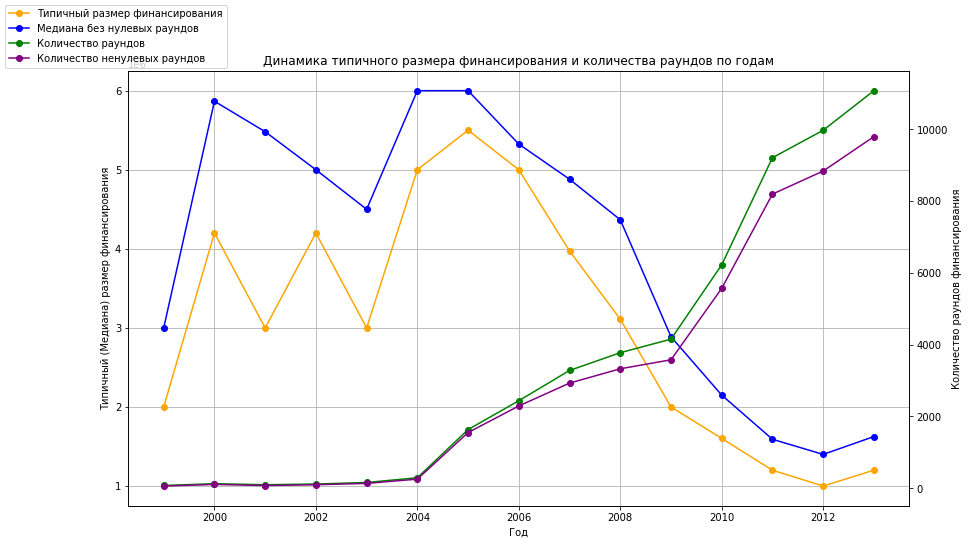

In [934]:
# Построение графика
fig, ax1 = plt.subplots(figsize=(14, 8))

# Графики для медианного размера финансирования
ax1.set_xlabel('Год')
ax1.set_ylabel('Типичный (Медиана) размер финансирования')

ax1.plot(fil_funding_by_year['funded_year'], 
         fil_funding_by_year['median_raised'], 
         marker='o', 
         label='Типичный размер финансирования',
         color='orange')
ax1.plot(fil_funding_by_year['funded_year'], 
         fil_funding_by_year['median_nonzero'], 
         marker='o',
         label='Медиана без нулевых раундов',
         color='blue')

ax1.grid(True)

# Графики для количества раундов на второй оси
ax2 = ax1.twinx()
ax2.set_ylabel('Количество раундов финансирования')

ax2.plot(fil_funding_by_year['funded_year'], 
         fil_funding_by_year['rounds_count'], 
         marker='o',
         label='Количество раундов',
         color='green')

ax2.plot(fil_funding_by_year['funded_year'], 
         fil_funding_by_year['nonzero_rounds_count'], 
         marker='o', 
         label='Количество ненулевых раундов',
         color='purple')


# Объединение легенд
fig.legend(loc='upper left')

plt.title('Динамика типичного размера финансирования и количества раундов по годам')
plt.show()

**Вывод**

Максимальное значение типичного размера финансирования (медиана) наблюдалось в 2005 году. После медианный размер значительно снизился. В 2013 году размер тпичного финансирования в крайне низком положении.

После пика 2005 года увеличилось количество раундов, но медианный размер финансирования снизился. В 2013 году наблюдается тенденция к росту числа раундов, что указывает на расширение возможностей для стартапов получить инвестиции.


### 2.4. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

Оценим, сколько строк имеют непустые значения в столбцах `instituition` или `graduated_at`

In [935]:
# Объединение столбцов
merged = people.merge(education, how='left', on='id')

In [936]:
# Фильтрация строк, где хотя бы один из столбцов не пуст (instituition или graduated_at)
education_non_empty = merged[
    (merged['instituition'].notna()) |
    (merged['graduated_at'].notna())
]

In [937]:
# Процент строк, где хотя бы один из столбцов не пуст
proportion_non_empty = (len(education_non_empty) / len(merged)) * 100
print(f'Процент строк, где есть информация либо в institution, либо в graduated_at: {proportion_non_empty:.2f}%')

Процент строк, где есть информация либо в institution, либо в graduated_at: 41.25%


Оценка полноты данных с присоединением таблицы `degrees`

In [938]:
# Присоединяем таблицу degrees 
full_education = merged.merge(degrees, on='id', how='left')

In [939]:
# Фильтрация строк, где хотя бы один из четырёх столбцов не пуст (instituition, graduated_at, degree_type, subject)
full_education_non_empty = full_education[
    (full_education['instituition'].notna()) |
    (full_education['graduated_at'].notna()) |
    (full_education['degree_type'].notna()) |
    (full_education['subject'].notna())
]

In [940]:
# Процент строк с полными данными о образовании (с присоединением degree)
proportion_full_non_empty = (len(full_education_non_empty) / len(full_education)) * 100
print(f'Процент строк, где есть информация хотя бы в одном из столбцов: institution, graduated_at, degree_type, subject: {proportion_full_non_empty:.2f}%')

Процент строк, где есть информация хотя бы в одном из столбцов: institution, graduated_at, degree_type, subject: 41.25%


В обоих сулчаях процент полноты данных = 41.25%, исходя из этого данные о образовании одинаково полные с и без присоединения таблицы degrees. Можно не присоединять.

In [941]:
# Посмотрим на объединенную таблицу
merged.head()

,id,first_name,last_name,company_id,network_username,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,6265.0,University of Pennsylvania,1989-01-01
1,100,Peter,Lester,27.0,NaN,938.0,Universidad Catolica del Uruguay,2006-01-01
2,1000,Dr. Steven,E. Saunders,292.0,NaN,13098.0,Golden Gate University,1999-01-01
3,10000,Neil,Capel,2526.0,NaN,74038.0,Cairo University,NaT
4,100000,Sue,Pilsch,NaN,NaN,89666.0,Ohio State University,NaT


In [942]:
#Оставим уникальные значения в столбце id
merged = merged.drop_duplicates(subset=['id'], keep='first')

In [943]:
# Добавим столбец has_education
merged['has_education'] = merged[['instituition', 'graduated_at']].notna().any(axis=1).astype(int)

In [944]:
# Группируем сотрудников по company_id
company_grouped = merged.groupby('company_id').agg(
    total_employees=('id', 'count'),
    employees_with_education=('has_education', 'sum')
).reset_index()

In [945]:
# Зададим границы и метки для групп
bins = [0, 5, 10, 20, 50, 100, float('inf')]
labels = ['1-5', '6-10', '11-20', '21-50', '51-100', '100+']

In [946]:
# Добавим категории размеров компаний
company_grouped['size_group'] = pd.cut(
    company_grouped['total_employees'],
    bins=bins,
    labels=labels,
    right=True
)

In [947]:
# Вычислим долю сотрудников без образования
company_grouped['without_education_ratio'] = (
    1 - company_grouped['employees_with_education'] / company_grouped['total_employees']
)

In [948]:
# Группируем по размеру компании и считаем среднюю долю
result = company_grouped.groupby('size_group').agg(
    average_without_education=('without_education_ratio', 'mean'),
    company_count=('company_id', 'count')
).reset_index()


In [949]:
result

,size_group,average_without_education,company_count
0,1-5,0.477006,22433
1,6-10,0.274534,368
2,11-20,0.360101,92
3,21-50,0.425924,19
4,51-100,0.482224,6
5,100+,0.264048,3


Малые компании (1-5 сотрудников) показывают более высокую долю сотрудников без образования, что может быть связано с ограниченными ресурсами для развития сотрудников/ наймом не особо квалифицированнх кадров, лишь бы был сотрудник. Крупные компании (100+ сотрудников) показывают значительно более низкую долю сотрудников без образования, что может свидетельствовать о том, что такие компании уделяют больше внимания образованию и обучению своих сотрудников.

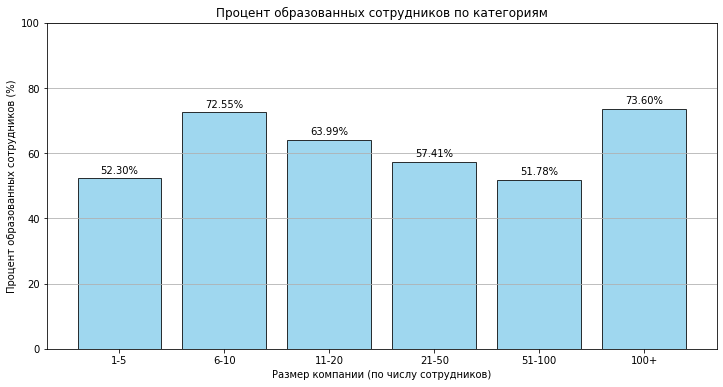

In [950]:
categories = result['size_group'].astype(str)
percentages = (1 - result['average_without_education']) * 100  # Преобразуем в процент образованных сотрудников

# Визуализация
plt.figure(figsize=(12, 6))
bars = plt.bar(categories, 
               percentages, 
               color='skyblue', 
               alpha=0.8, 
               edgecolor='black')

# Значения над столбцами
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f"{percentage:.2f}%", ha='center', va='bottom', fontsize=10)

plt.ylim(0, 100)
plt.xlabel("Размер компании (по числу сотрудников)")
plt.ylabel("Процент образованных сотрудников (%)")
plt.title("Процент образованных сотрудников по категориям")
plt.grid(axis='y')

plt.show()

**Вывод**

Компании с числом сотрудников 6-10 демонстрируют наибольший процент образованных сотрудников. Для небольших компаний может быть полезно развивать внутренние программы обучения. В крупных компаниях (100+) наблюдается рост доли образованных сотрудников, для них важно поддерживать высокие стандарты найма и фокусироваться на профессиональном развитии сотрудников.

<a class="anchor" id="3-bullet"></a>
## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [951]:
companies_fil =  companies[(
        (companies['funding_rounds'] > 0) 
        | (companies['investment_rounds'] > 0)
    ) | (companies['status'] == 'acquired')
]

In [952]:
companies_fil

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,raised_amount
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,5250000.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,5000000.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0,10000000.0
217459,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0,500000.0
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0,20000000.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0,1300000.0


In [953]:
# Выведем все столбцы
companies_fil.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'raised_amount'],
      dtype='object')

In [954]:
# Создадим копию 
companies_fil = companies_fil.copy()

# Преобразуем столбец funding_total
companies_fil['funding_total'] = pd.to_numeric(companies_fil['funding_total'], errors='coerce')

In [955]:
companies_fil

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,raised_amount
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,5250000.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,5000000.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0,10000000.0
217459,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0,500000.0
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0,20000000.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0,1300000.0


**Вывод**

Получен новый датасет `companies_fil`, в котором хранятся данные о приобретенных компаниях с ненулевыми числом инвестиционных раундов и раундов финансирования.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* Аномальные значения установите графически, а типичные при помощи таблиц и формул.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [956]:
# Описание данных
funding_stats = companies_fil['funding_total'].describe()

# Переведем значения в миллионы и окргулим до 2 знаков после запятой
funding_stats_formatted = funding_stats.apply(lambda x: f"{x/1e6:.2f}M" if x >= 1e6 else f"{x:.2f}")

print(funding_stats_formatted)

count     40747.00
mean        10.14M
std         56.46M
min           0.00
25%           0.00
50%      600000.00
75%          5.65M
max       5700.00M
Name: funding_total, dtype: object


Построим визуализацию, учитывая выбросы

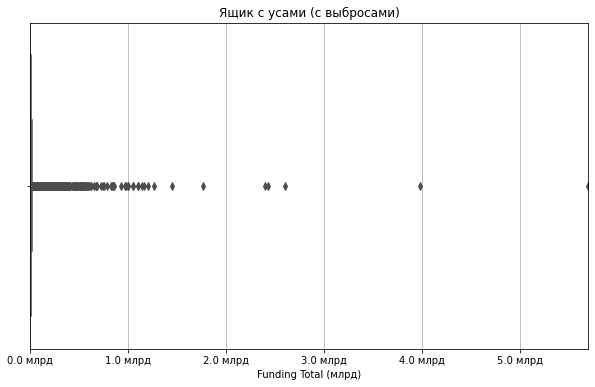

In [957]:
# Преобразование funding_total в миллиарды
companies_fil['funding_total_bln'] = companies_fil['funding_total'] / 1e9

# Создание ящика с усами
plt.figure(figsize=(10, 6))
sns.boxplot(x=companies_fil['funding_total_bln'], 
            color='gray')

# Подписи
plt.xlabel("Funding Total (млрд)")
plt.title("Ящик с усами (с выбросами)")
plt.xticks(fontsize=10)
plt.grid(axis='x')
plt.xticks(
    ticks=plt.xticks()[0],
    labels=[f"{tick:.1f} млрд" for tick in plt.xticks()[0]])
plt.xlim(0, companies_fil['funding_total_bln'].max() )

plt.show()

Большинство данных сосредоточено ниже 1 млрд.. Наблюдается большое количество выбросов выше верхней границы (1.43млрд).

In [958]:
# границы выбросов
Q1 = funding_stats['25%']
Q3 = funding_stats['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")

Нижняя граница выбросов: -8475975.0
Верхняя граница выбросов: 14126625.0


Обрежем выбросы и создадим график без них

In [959]:
# Преобразование funding_total в миллионы
companies_fil['funding_total_mln'] = companies_fil['funding_total'] / 1e6
# Фильтрация данных для исключения верхних выбросов
filtered_data = companies_fil[companies_fil['funding_total_mln'] < 150]['funding_total_mln'].dropna()

filtered_data

0         39.75
3          0.00
4          0.00
15         5.00
20         0.00
          ...  
217458    10.00
217459     0.50
217463    44.00
217467     1.30
217469    57.50
Name: funding_total_mln, Length: 40402, dtype: float32

In [960]:
# Расчет границ
std_dev = filtered_data.std()
mean = filtered_data.mean()
Q1, Q3 = filtered_data.quantile([0.25, 0.75])
IQR = Q3 - Q1

std_2_pos =  mean + 2 * std_dev
iqr_upper = Q3 + 1.5 * IQR
percentile_90 = filtered_data.quantile(0.90)
percentile_95 = filtered_data.quantile(0.95)
percentile_975 = filtered_data.quantile(0.975)
percentile_99 = filtered_data.quantile(0.99)

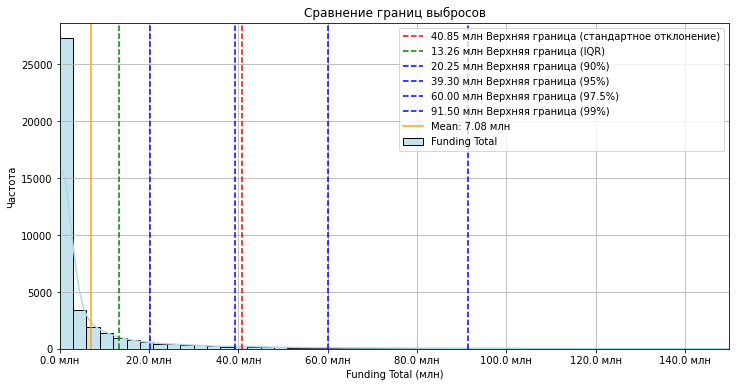

In [961]:
# Построим гистограмму
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data, 
             bins=50, 
             kde=True, 
             color="lightblue", 
             alpha=0.7, 
             label="Funding Total")

# Линии границ
plt.axvline(x=std_2_pos, color='red', linestyle='--', 
            label=f'{std_2_pos:.2f} млн Верхняя граница (стандартное отклонение)')
plt.axvline(x=iqr_upper, color='green', linestyle='--', 
            label=f'{iqr_upper:.2f} млн Верхняя граница (IQR)')
plt.axvline(x=percentile_90, color='blue', 
            linestyle='--', label=f'{percentile_90:.2f} млн Верхняя граница (90%)')
plt.axvline(x=percentile_95, color='blue', 
            linestyle='--', label=f'{percentile_95:.2f} млн Верхняя граница (95%)')
plt.axvline(x=percentile_975, color='blue', 
            linestyle='--', label=f'{percentile_975:.2f} млн Верхняя граница (97.5%)')
plt.axvline(x=percentile_99, color='blue', 
            linestyle='--', label=f'{percentile_99:.2f} млн Верхняя граница (99%)')

# Среднее значение
plt.axvline(mean, color='orange', linestyle='-', label=f'Mean: {mean:.2f} млн')

plt.title('Сравнение границ выбросов')
plt.xlabel('Funding Total (млн)')
plt.ylabel('Частота')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(
    ticks=plt.xticks()[0],
    labels=[f'{tick:.1f} млн' for tick in plt.xticks()[0]]
)
plt.xlim(0, filtered_data.max())  

plt.show()

Распределение данных скощено вправо, имеется длинный хвост выбросов. Типичные значения лежат в диапазоне от 0 до 10 млн..

#### Типичные значения:

Большинство компаний получают финансирование около медианы (600тыс.) и 75-го перцентиля (5.65млн).

#### Выбивающиеся значения:

Все значения выше 14.13млн можно считать аномальными, верхние перцентили (97.5% и 99%) подтверждают эту границу.

Метод `.describe()` плохо подходит к анализу, т.к. данные сильно скошены: гистограмма имеет длинный правый хвост, что указывает на то, что большие значения значительно превышают среднее, также вычисление стандартного отклонения, предполагают симметричное распределение данных. В данном случае стандартное отклонение (56.46млн) слишком велико и вредит анализу, т.к. связано с сильным влиянием выбросов.


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

Кроме этого, заказчик скоро получит доступ к базе данных {gray}(\{\{SQLite\}\}\[da_new_sprint8_modul2_project_SQLite\]), которая содержит данные по ценам покупки стартапов и размерам предварительного финансирования.

Известно, что данные в базе похожи на имеющиеся, однако в ней отсутствуют как оконные функции, так и встроенные функции для расчёта квартилей и процентилей. Эту работу придётся делать вручную. Для облегчения расчётов заказчик хочет определить, каким процентилям соответствуют выбросы.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [962]:
# Фильтр компаний
sold_companies = companies_fil[
    (companies_fil['status'] == 'acquired') &    
    (companies_fil['funding_total'] > 0) &       
    (companies_fil['raised_amount'].isin([0, 1]))  
]

sold_companies

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,raised_amount,funding_total_bln,funding_total_mln
5491,13207.0,JamLegend,games_video,acquired,NaT,NaT,jamlegend.com,jamlegend,Unknown,0.0,2.0,2000000.0,0.0,0.0,0.002000,2.000
6891,138030.0,NSFW Corporation,news,acquired,2011-01-01,NaT,nsfwcorp.com,nsfwcorp,USA,0.0,2.0,250000.0,2.0,0.0,0.000250,0.250
7381,139237.0,TrustGo,security,acquired,2011-06-08,NaT,trustgo.com,TrustGoMobile,USA,0.0,2.0,1500000.0,1.0,0.0,0.001500,1.500
16361,150658.0,Karma,mobile,acquired,2011-01-01,NaT,getkarma.com,getkarma,USA,0.0,2.0,2305000.0,2.0,0.0,0.002305,2.305
23909,1591.0,Scout Labs,enterprise,acquired,NaT,NaT,scoutlabs.com,NaN,USA,0.0,3.0,4000000.0,5.0,0.0,0.004000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212631,83535.0,ImpulseSave,mobile,acquired,2010-01-01,NaT,impulsesave.com,impulsesave,USA,0.0,3.0,50000.0,3.0,0.0,0.000050,0.050
215339,867.0,GamerDNA,web,acquired,2006-10-01,NaT,gamerdna.com,GamerDNA,USA,0.0,2.0,3000000.0,3.0,0.0,0.003000,3.000
216787,9665.0,Atrua Technologies,mobile,acquired,2000-01-01,NaT,atrua.com,NaN,USA,0.0,3.0,13000000.0,1.0,0.0,0.013000,13.000
216973,9782.0,ReTel Technologies,analytics,acquired,2007-10-01,NaT,reteltechnologies.com,reteltech,USA,0.0,2.0,1000000.0,3.0,0.0,0.001000,1.000


In [963]:
# Убираем пропущенные значения в столбце funding_total
funding_total_clean = sold_companies['funding_total'].dropna()

# 1 и 3 квартили с помощью pandas
q1 = funding_total_clean.quantile(0.25)
q3 = funding_total_clean.quantile(0.75)

iqr = q3 - q1

# Верхняя и нижняя границы выбросов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Вывод границ
print(f'Нижняя граница выбросов: {lower_bound}')
print(f'Верхняя граница выбросов: {upper_bound}')

# Определение процентилей границ
lower_percentile = (funding_total_clean <= lower_bound).mean() * 100
upper_percentile = 100 - (funding_total_clean >= upper_bound).mean() * 100  

print(f'Нижняя граница соответствует {lower_percentile:.2f} процентилям')
print(f'Верхняя граница соответствует {upper_percentile:.2f} процентилям')

Нижняя граница выбросов: -20428062.5
Верхняя граница выбросов: 37976837.5
Нижняя граница соответствует 0.00 процентилям
Верхняя граница соответствует 96.88 процентилям


**Вывод**

Нижняя граница указывает на то, что в данных отсутствуют реальные выбросы в нижней части, так как финансирование не может быть отрицательным. Верхняя граница позволяет выявить компании с аномально высоким финансированием. Процентиль для нижней границы находится за пределами распределения, что означает, что ни одна компания не попадает под эту границу. Верхняя граница выбросов охватывает верхние 96.88% значений финансирования.

Нижнюю границу выбросов можно игнорировать, так как финансирование не может быть отрицательным. Замена нижней границы не имеет смысла, так как выбросы отсутствуют в нижней части. Замена верхней границы выбросов на значение, рассчитанное по процентилям, может быть использовано, например, замена на 85-й или 90-й процентиль хорошо отразит характер данных. 


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [964]:
# Удалим пропущенные значения в столбце funding_total
companies_fil_clean = companies_fil.dropna(subset=['funding_total'])

# Медиану и стандартное отклонение для каждой категории 
category_stats = companies_fil_clean.groupby('category_code')['funding_total'].agg(
    median_funding='median',
    std_funding='std'
).reset_index()

# Сортировка по медиане 
top_median_funding = category_stats.sort_values(by='median_funding', ascending=False)

# Сортировка по стандартному отклонению 
top_std_funding = category_stats.sort_values(by='std_funding', ascending=False)

# Топ категорий по медиане и стандартному отклонению
top_median_funding_top_n = top_median_funding.head(5)  
top_std_funding_top_n = top_std_funding.head(5)  

print('Топ 5 категорий стартапов с наибольшими ценами (медианой):')
print(top_median_funding_top_n)

print('\nТоп 5 категорий стартапов с наибольшим разбросом цен (стандартное отклонение):')
print(top_std_funding_top_n)

Топ 5 категорий стартапов с наибольшими ценами (медианой):
    category_code  median_funding   std_funding
35  semiconductor       8100000.0  3.992461e+07
4       cleantech       6000000.0  9.215550e+07
20        medical       5400000.0  3.354983e+07
24       nanotech       5115960.0  9.596109e+07
3         biotech       4000000.0  5.465791e+07

Топ 5 категорий стартапов с наибольшим разбросом цен (стандартное отклонение):
   category_code  median_funding   std_funding
2     automotive       1300000.0  1.832047e+08
22        mobile        800000.0  1.459792e+08
36        social        355000.0  1.114758e+08
15        health       1000000.0  1.050341e+08
24      nanotech       5115960.0  9.596109e+07


**Вывод**

В топ 5 категорий стартапов с наибольшими ценами входят компании, которые стабильно получают более высокое финансирование. Высокая медиана свидетельствует о том, что часть компаний в этих секторах получает финансирование выше, чем в других категориях. В данном случае смотрим именно на медиану, поскольку она устойчива к выбросам и дает более точную оценку типичного финансирования.

В топ 5 категорий стартапов с наибольшим разбросом цен входят компании, у которых большое стандартное отклонение - оно указывает на значительную вариативность финансирования. В этих секторах существуют как высокофинансируемые компании, так и компании с небольшими вложениями. Здесь актуальнее учитывать стандартное отклонение, так как анализ разброса дает понимание о тос, насколько финансирование в данной категории отличается от среднего значения. 

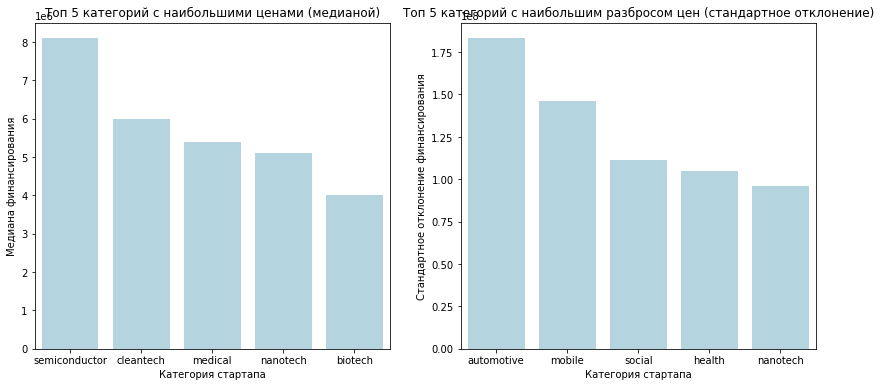

In [965]:
# Топ 5 категорий с наибольшими ценами (медианой)
top_median_funding_top_n = top_median_funding.head(5)

# Топ 5 категорий с наибольшим разбросом цен (стандартное отклонение)
top_std_funding_top_n = top_std_funding.head(5)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Медиана финансирования 
sns.barplot(data=top_median_funding_top_n, 
            x='category_code', 
            y='median_funding', 
            ax=axes[0], 
            color="lightblue")
axes[0].set_title('Топ 5 категорий с наибольшими ценами (медианой)')
axes[0].set_xlabel('Категория стартапа')
axes[0].set_ylabel('Медиана финансирования')

# Стандартное отклонение 
sns.barplot(data=top_std_funding_top_n, 
            x='category_code', 
            y='std_funding', 
            ax=axes[1], 
            color="lightblue")
axes[1].set_title('Топ 5 категорий с наибольшим разбросом цен (стандартное отклонение)')
axes[1].set_xlabel('Категория стартапа')
axes[1].set_ylabel('Стандартное отклонение финансирования')

plt.show()

**Вывод**

Такие категории, как semiconductor, cleantech, и medical, привлекают больше финансирования. Это, вероятно, связано с тем, что данные технологии требуют больших инвестиций на этапе исследований и разработок. Эти категории могут быть привлекательны для инвесторов, которые ищут стабильные, высокобюджетные проекты.

Категории аutomotive, mobile, и social демонстрируют значительную вариативность. Это может быть вызвано наличием как крупных, так и мелких проектов в этих категориях. Высокий разброс указывает на высокий риск, но и потенциал для крупных доходов.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [966]:
# Фильтрация компаний с хотя бы одним раундом финансирования
companies_with_rounds = companies_fil_clean[companies_fil_clean['funding_rounds'] > 0]

In [967]:
# Группировка по статусу, среднее количество раундов
status_funding_rounds = companies_with_rounds.groupby('status')['funding_rounds'].mean().reset_index()

print('Среднее количество раундов по статусам:')
print(status_funding_rounds)

Среднее количество раундов по статусам:
      status  funding_rounds
0   acquired        1.896645
1     closed        1.383437
2        ipo        2.526531
3  operating        1.642359


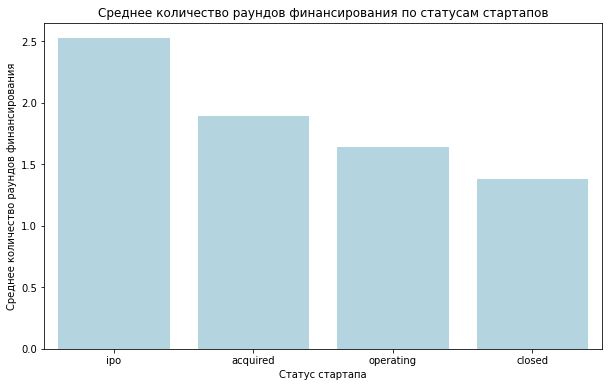

In [968]:
# Сортировка по среднему количеству раундов
status_funding_rounds_sorted = status_funding_rounds.sort_values(by='funding_rounds', ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(data=status_funding_rounds_sorted, 
            x='status', 
            y='funding_rounds', 
            color='lightblue')


plt.title('Среднее количество раундов финансирования по статусам стартапов')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов финансирования') 

plt.show()

**Вывод**

Стартапы, вышедшие на IPO, имеют наибольшее среднее количество раундов финансирования (2.53). Это указывает на то, что компании, успешно доходящие до IPO, обычно проходят больше раундов для привлечения достаточного объема капитала. Закрытые стартапы имеют наименьшее среднее количество раундов финансирования (1.38). Это может свидетельствовать о том, что такие компании не успели привлечь достаточное количество капитала или прекратили свою деятельность на более ранних стадиях развития.

<a class="anchor" id="4-bullet"></a>

## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

### Выводы

- Данные очищены и предобработаны, выделены ключевые метрики для анализа, но значительная доля пропусков в отдельных таблицах требует фокусировки на более качественных датасетах.

- Проведена детальная структуризация данных, включая проверку достоверности. Уточнены ключевые признаки, связанные с успехом стартапов.

- Выявлено, что в 2013 году наблюдалась тенденция к росту числа раундов, что указывает на расширение возможностей для стартапов получить инвестиции.

- Данные об образовании подтверждают связь между квалификацией основателей и успехом компаний.

- Проведён продвинутый анализ цен, выбросов и категорий стартапов. Установлены зависимости стоимости от категории и финансирования, что важно для оценки перспективности сделок.

- Определили, что финансирование напрямую влияет на оценку компании, но разброс увеличивается с ростом объёма привлечённых средств.

- Компании с наибольшим числом раундов финансирования и квалифицированными основателями показывают более высокую вероятность успеха. 

### Рекомендации

- Покупать стартапы с перспективной технологией, но недостаточным финансированием, чтобы использовать их скрытый потенциал.

- Учитывать разброс стоимости внутри категорий, чтобы минимизировать риски при оценке.

- Сосредоточить внимание на стартапах в категориях с высокой медианной стоимостью (semiconductor, biotech и др.) для максимизации прибыли.

- Рассматривать сделки за 0$ и 1$ как возможность приобретения активов с минимальными затратами, если у стартапа есть ценные патенты, технологии или опытная команда.

- Оценивать стартапы с учётом стадии их развития, числа раундов финансирования и квалификации основателей.

- Сосредотачиваться на стартапах с сильной командой и понятной бизнес-моделью.

- Обновлять информацию о рыночных трендах и изменениях в категориях стартапов.

- Продавать стартапы крупным игрокам или фондам, заинтересованным в быстром доступе к новым технологиям.